# **Location or Size: What Influences House Prices in Mexico?**

# **Importing and Preparing Mexico Data**

In [24]:
#Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [25]:
# Read the CSV with dollar sign and commas
df1 = pd.read_csv('mexico-real-estate-1.csv', encoding='latin1')
df2 = pd.read_csv('mexico-real-estate-2.csv', encoding='latin1')
df3 = pd.read_csv('mexico-real-estate-3.csv', encoding='latin1')

df1.drop(columns="s/n", inplace=True)
df2.drop(df2.columns[0], axis=1, inplace=True)
df3.drop(df3.columns[0], axis=1, inplace=True)

# Print object type and shape for DataFrames
print("df1 type:", type(df1))
print("df1 shape:", df1.shape)
print()
print("df2 type:", type(df2))
print("df2 shape:", df2.shape)
print()
print("df3 type:", type(df3))
print("df3 shape:", df3.shape)

df3.head()

df1 type: <class 'pandas.core.frame.DataFrame'>
df1 shape: (700, 6)

df2 type: <class 'pandas.core.frame.DataFrame'>
df2 shape: (700, 6)

df3 type: <class 'pandas.core.frame.DataFrame'>
df3 shape: (700, 5)


,property_type,place_with_parent_names,lat-lon,area_m2,price_usd
0,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71,48550.59
1,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233,168636.73
2,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300,86932.69
3,house,|México|Morelos|Temixco|Burgos Bugambilias|,NaN,275,263432.41
4,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84,68508.67


## **Clean df1**

In [26]:
# Print df1 shape
print(df1.shape)

# Print df1 info
df1.info()

# Get output of df1 head
df1.head()

(700, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  700 non-null    object 
 1   state          700 non-null    object 
 2   lat            583 non-null    float64
 3   lon            583 non-null    float64
 4   area_m2        700 non-null    int64  
 5   price_usd      700 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 32.9+ KB


,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,"$67,965.56"
1,house,Nuevo León,25.688436,-100.198807,186,"$63,223.78"
2,apartment,Guerrero,16.767704,-99.764383,82,"$84,298.37"
3,apartment,Guerrero,16.829782,-99.911012,150,"$94,308.80"
4,house,Veracruz de Ignacio de la Llave,NaN,NaN,175,"$94,835.67"


In [27]:
# Drop null values from df1
df1.dropna(inplace=True)

# Clean "price_usd" column in df1
df1["price_usd"] = df1["price_usd"].str.replace(r"[\$,]", "", regex=True).astype(float)

# Print object type, shape, and head
print("df1 type:", type(df1))
print("df1 shape:", df1.shape)
df1.head()

df1 type: <class 'pandas.core.frame.DataFrame'>
df1 shape: (583, 6)


,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,67965.56
1,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80
5,house,Yucatán,21.052583,-89.538639,205,105191.37


## **Clean df2**

In [28]:
# Drop null values from df2
df2.dropna(inplace=True)

# Create "price_usd" column for df2 (19 pesos to the dollar in 2014)
df2["price_usd"] = (df2["price_mxn"] / 19).round(2)

# Drop "price_mxn" column from df2
df2.drop(columns="price_mxn", inplace=True)

# Print object type, shape, and head
print("df2 type:", type(df2))
print("df2 shape:", df2.shape)
df2.head()

df2 type: <class 'pandas.core.frame.DataFrame'>
df2 shape: (571, 6)


,property_type,state,lat,lon,area_m2,price_usd
0,apartment,Nuevo León,25.721081,-100.345581,72,68421.05
2,house,Morelos,23.634501,-102.552788,360,278947.37
6,apartment,Estado de México,19.272040,-99.572013,85,65789.47
7,house,San Luis Potosí,22.138882,-100.996510,158,111578.95
8,apartment,Distrito Federal,19.394558,-99.129707,65,39904.74


## **Clean **df3****

In [29]:
# Drop null values from df3
df3.dropna(inplace=True)

# Create "lat" and "lon" columns for df3
df3[["lat", "lon"]] = df3["lat-lon"].str.split(",", expand=True)

# Print object type, shape, and head
print("df3 type:", type(df3))
print("df3 shape:", df3.shape)
df3.head()

df3 type: <class 'pandas.core.frame.DataFrame'>
df3 shape: (582, 7)


,property_type,place_with_parent_names,lat-lon,area_m2,price_usd,lat,lon
0,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71,48550.59,19.52589,-99.151703
1,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233,168636.73,19.2640539,-99.5727534
2,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300,86932.69,19.268629,-99.671722
4,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84,68508.67,19.511938,-96.871956
5,house,|México|Jalisco|Guadalajara|,"20.689157,-103.366728",175,102763.00,20.689157,-103.366728


In [30]:
# Create "state" column for df3
df3["state"] = df3["place_with_parent_names"].str.split("|", expand=True)[2]

# Drop "place_with_parent_names" and "lat-lon" from df3
df3.drop(columns=["place_with_parent_names", "lat-lon"], inplace=True)

# Print object type, shape, and head
print("df3 type:", type(df3))
print("df3 shape:", df3.shape)
df3.head()

df3 type: <class 'pandas.core.frame.DataFrame'>
df3 shape: (582, 6)


,property_type,area_m2,price_usd,lat,lon,state
0,apartment,71,48550.59,19.52589,-99.151703,Distrito Federal
1,house,233,168636.73,19.2640539,-99.5727534,Estado de México
2,house,300,86932.69,19.268629,-99.671722,Estado de México
4,apartment,84,68508.67,19.511938,-96.871956,Veracruz de Ignacio de la Llave
5,house,175,102763.00,20.689157,-103.366728,Jalisco


## **Concatenate DataFrames**

In [31]:
# Concatenate df1, df2, and df3
df = pd.concat([df1, df2, df3], axis=0)

# Print object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (1736, 6)


,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,67965.56
1,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80
5,house,Yucatán,21.052583,-89.538639,205,105191.37


# **Exploratory Data Analysis**

In [33]:
# Use plotly express to create figure
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat=df["lat"],
    lon=df["lon"],
    center={"lat": 19.43, "lon": -99.13},  # Map will be centered on Mexico City
    width=400,  # Width of map
    height=400,  # Height of map
    hover_data=["price_usd"],  # Display price when hovering mouse over house
)

# Add mapbox_style to figure layout
fig.update_layout(mapbox_style="open-street-map")

# Show figure
fig.show()

## **Categorical Data: "state"**

In [34]:
# Get value counts of "state" column
df["state"].value_counts()

state
Distrito Federal                   303
Estado de México                   179
Yucatán                            171
Morelos                            160
Querétaro                          128
Veracruz de Ignacio de la Llave    117
Puebla                              95
Nuevo León                          83
Jalisco                             60
San Luis Potosí                     55
Chiapas                             55
Guerrero                            49
Tamaulipas                          48
Quintana Roo                        38
Baja California                     29
Sinaloa                             26
Chihuahua                           20
Tabasco                             20
Hidalgo                             17
Baja California Sur                 15
Sonora                              12
Guanajuato                          12
Aguascalientes                      10
Nayarit                              9
Durango                              7
Tlaxcala           

## **Numerical Data: "area_m2" and "price_usd"**

In [35]:
# Describe "area_m2", "price_usd" columns

df[["area_m2", "price_usd"]].describe()

,area_m2,price_usd
count,1736.000000,1736.000000
mean,170.261521,115331.980766
std,80.594539,65426.173873
min,60.000000,33157.890000
25%,101.750000,65789.470000
50%,156.000000,99262.130000
75%,220.000000,150846.665000
max,385.000000,326733.660000


**Create a histogram of "area_m2". Make sure that the x-axis has the label "Area [sq meters]", the y-axis has the label "Frequency", and the plot has the title "Distribution of Home Sizes".**

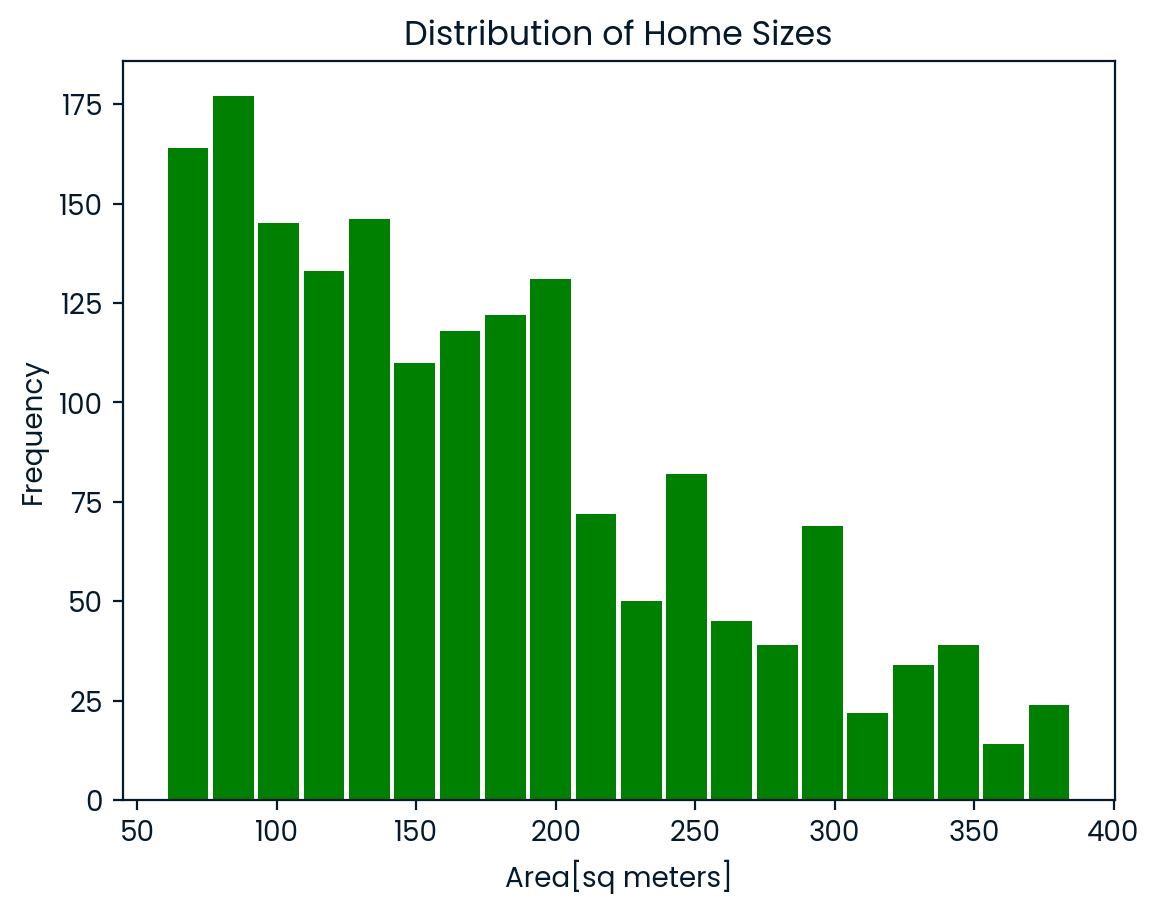

In [39]:
plt.hist(df["area_m2"], bins=20, rwidth=0.9, color="g")

# Add x-axis label
plt.xlabel("Area[sq meters]")

# Add y-axis label
plt.ylabel("Frequency")

# Add title
plt.title("Distribution of Home Sizes")

plt.show()

**Create a horizontal boxplot of "area_m2". Make sure that the x-axis has the label "Area [sq meters]" and the plot has the title "Distribution of Home Sizes". How is the distribution and its left skew represented differently here than in your histogram?**

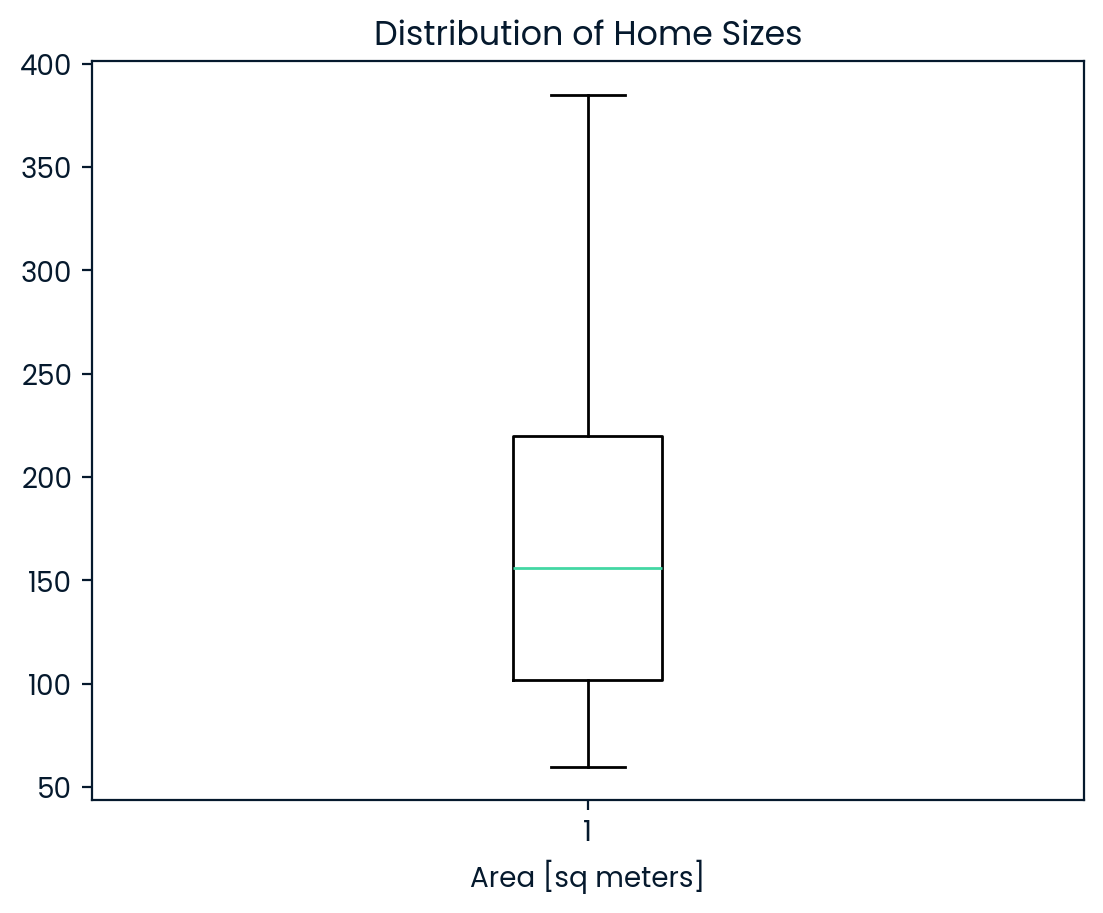

In [41]:
# Use Matplotlib to create boxplot of "area_m2"
plt.boxplot(df["area_m2"])

# Add x-axis label
plt.xlabel("Area [sq meters]")

# Add title
plt.title("Distribution of Home Sizes");

**Create a histogram of "price_usd". Make sure that the x-axis has the label "Price [USD]", the y-axis has the label "Frequency", and the plot has the title "Distribution of Home Prices"**

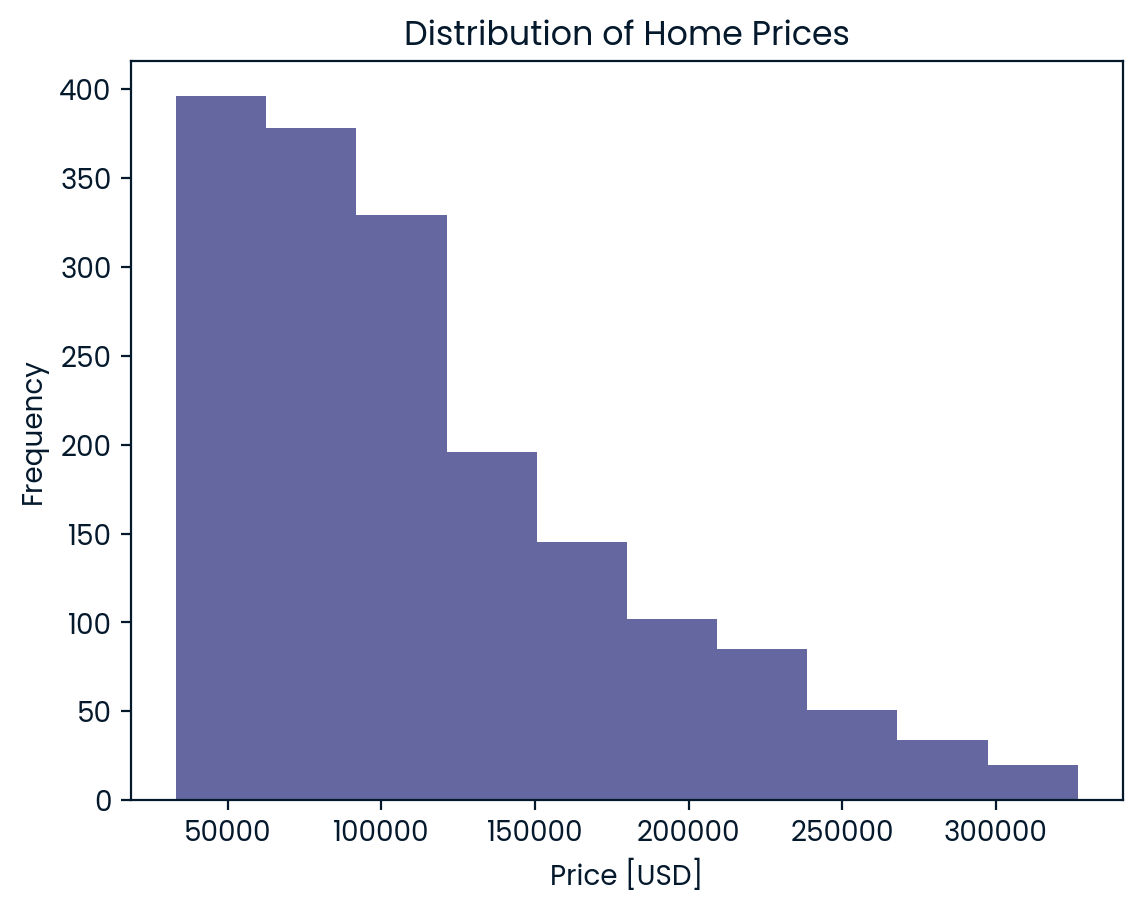

In [43]:
# Use Matplotlib to create histogram of "price_usd"
plt.hist(df["price_usd"])

# Add x-axis label
plt.xlabel("Price [USD]")

# Add y-axis label
plt.ylabel("Frequency")

# Add title
plt.title("Distribution of Home Prices");

**Create a horizontal boxplot of "price_usd". Make sure that the x-axis has the label "Price [USD]" and the plot has the title "Distribution of Home Prices"**

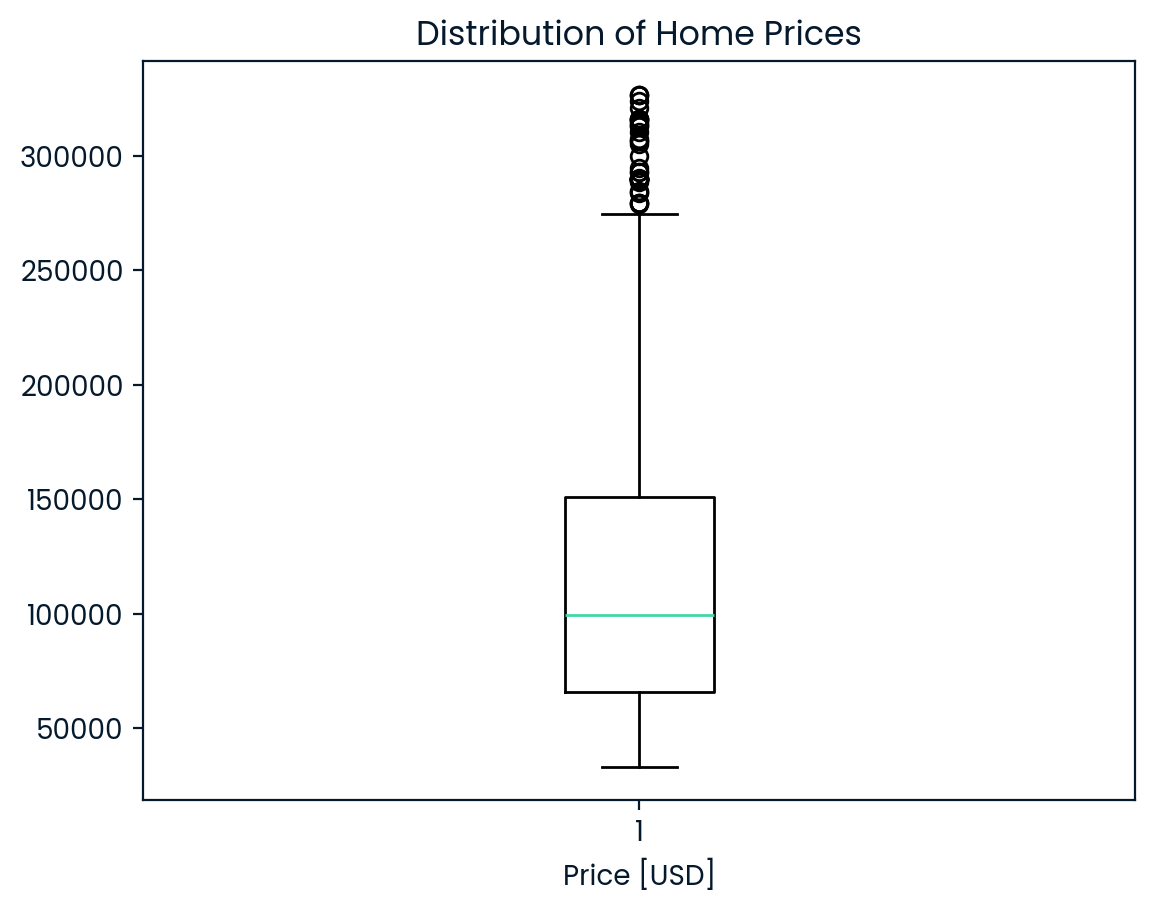

In [45]:
# Use Matplotlib to create boxplot of "price_usd"

plt.boxplot(df["price_usd"])

# Add x-label axis
plt.xlabel("Price [USD]")

# Add y-label axis
plt.title("Distribution of Home Prices");

# **Research Question 1
# Which state has the most expensive real estate market?**

**Do housing prices vary by state? If so, which are the most expensive states for purchasing a home? During our exploratory data analysis, we used descriptive statistics like mean and median to get an idea of the "typical" house price in Mexico. Now, we need to break that calculation down by state and visualize the results.

**We know in which state each house is located thanks to the "state" column. The next step is to divide our dataset into groups (one per state) and calculate the mean house price for each group.

**Task 1.4.2:** **Use the groupby method to create a Series named mean_price_by_state, where the index contains each state in the dataset and the values correspond to the mean house price for that state. Make sure your Series is sorted from highest to lowest mean price.***

In [46]:
# Declare variable `mean_price_by_state`
mean_price_by_state = df.groupby("state")["price_usd"].mean().sort_values(ascending=False)

# Print object type, shape, and head
print("mean_price_by_state type:", type(mean_price_by_state))
print("mean_price_by_state shape:", mean_price_by_state.shape)
mean_price_by_state.head()

mean_price_by_state type: <class 'pandas.core.series.Series'>
mean_price_by_state shape: (30,)


state
Querétaro           133955.913281
Guanajuato          133277.965833
Nuevo León          129221.985663
Distrito Federal    128347.267426
Quintana Roo        128065.416053
Name: price_usd, dtype: float64

**Task 1.4.3: Use mean_price_by_state to create a bar chart of your results. Make sure the states are sorted from the highest to lowest mean, that you label the x-axis as "State" and the y-axis as "Mean Price [USD]", and give the chart the title "Mean House Price by State".

**Create a bar chart using pandas.****

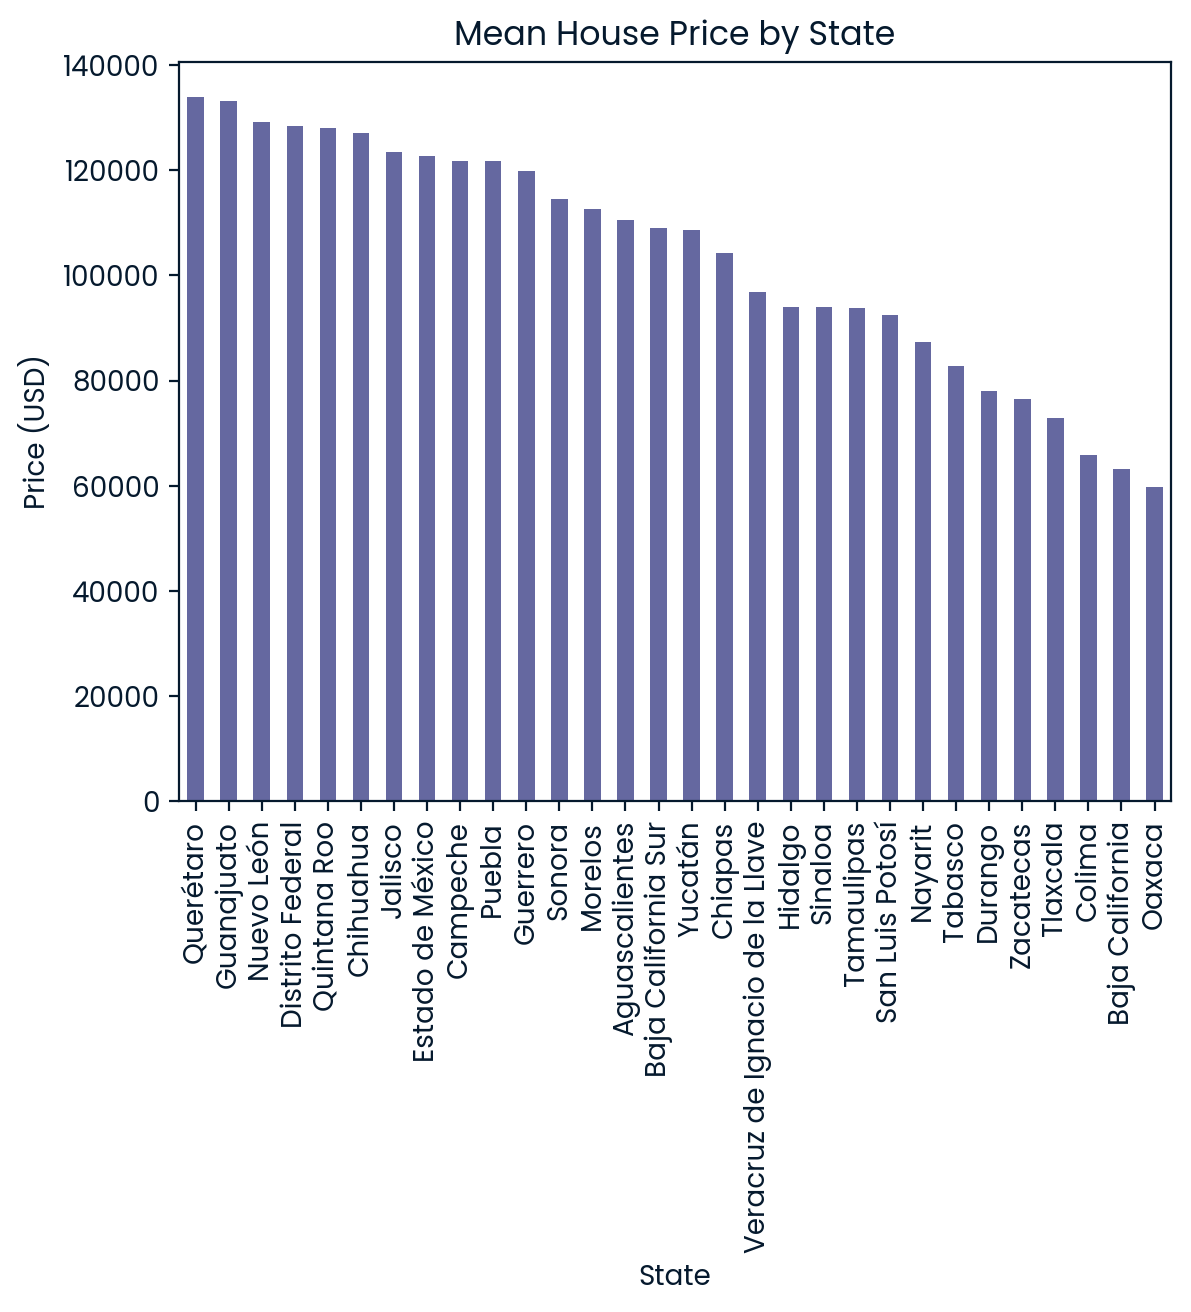

In [47]:
# Create bar chart from `mean_price_by_state` using pandas
mean_price_by_state.plot(
    kind="bar",
    xlabel="State",
    ylabel="Price (USD)",
    title="Mean House Price by State"
);

**It seems odd that Querétaro would be the most expensive real estate market in Mexico when, according to recent GDP numbers, it's not in the top 10 state economies. With all the variations in house sizes across states, a better metric to look at would be price per m2. In order to do that, we need to create a new column.

**Task 1.4.4: Create a new column in df called "price_per_m2". This should be the price for each house divided by it's size. **Create new columns derived from existing columns in a DataFrame using pandas.***

In [49]:
# Create "price_per_m2" column
df["price_per_m2"] = df["price_usd"] / df["area_m2"]

# Print object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)

df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (1736, 7)


,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
0,house,Estado de México,19.560181,-99.233528,150,67965.56,453.103733
1,house,Nuevo León,25.688436,-100.198807,186,63223.78,339.912796
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37,1028.028902
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80,628.725333
5,house,Yucatán,21.052583,-89.538639,205,105191.37,513.128634


**Let's redo our bar chart from above, but this time with the mean of "price_per_m2" for each state.

**Task 1.4.5: First, use the groupby method to create a Series where the index contains each state in the dataset and the values correspond to the mean house price per m2 for that state. Then use the Series to create a bar chart of your results. Make sure the states are sorted from the highest to lowest mean, that you label the x-axis as "State" and the y-axis as "Mean Price per M^2[USD]", and give the chart the title "Mean House Price per M^2 by State".***

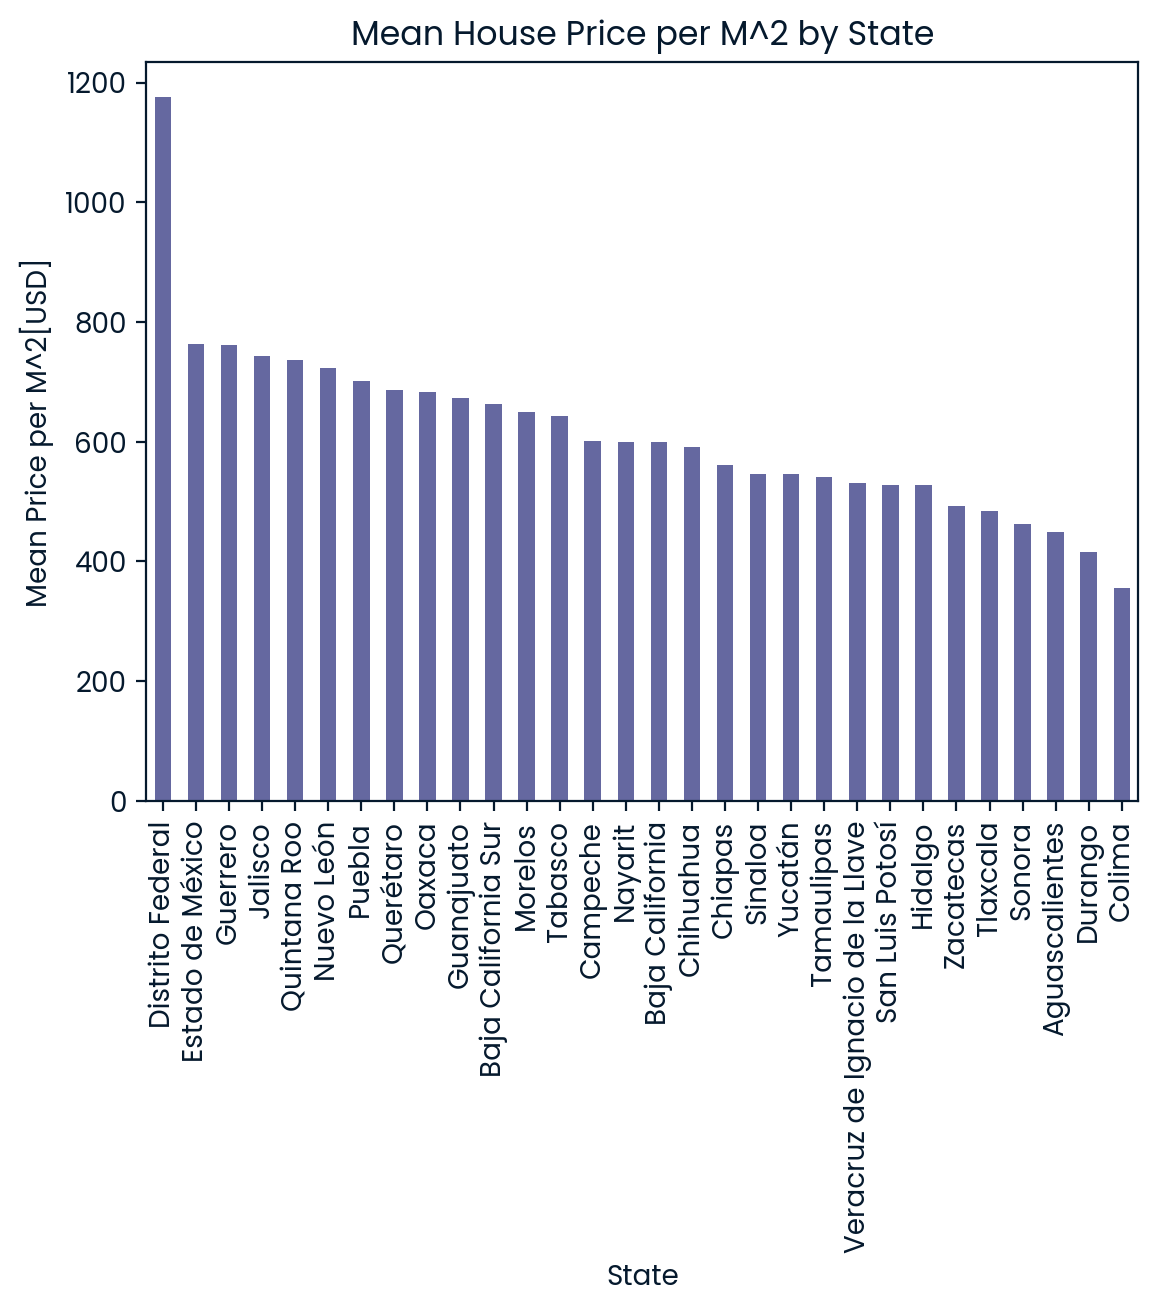

In [50]:
# Group `df` by "state", create bar chart of "price_per_m2"
mean_price_by_stateM2 = df.groupby("state")["price_per_m2"].mean().sort_values(ascending=False)
mean_price_by_stateM2.plot(
        kind = "bar",
        xlabel="State",
        ylabel="Mean Price per M^2[USD]",
        title="Mean House Price per M^2 by State"
);

# **Research Question 2
# Is there a relationship between home size and price?**

**From our previous question, we know that the location of a home affects its price (especially if it's in Mexico City), but what about home size? Does the size of a house influence price?

**A scatter plot can be helpful when evaluating the relationship between two columns because it lets you see if two variables are correlated — in this case, if an increase in home size is associated with an increase in price.**

## **Task 1.4.6: Create a scatter plot from df that represents price as a function of size. In other words, "area_m2" should be on the x-axis, and "price_usd" should be on the y-axis. Be sure to use expressive axis labels ("Area [sq meters]" and "Price [USD]", respectively).****

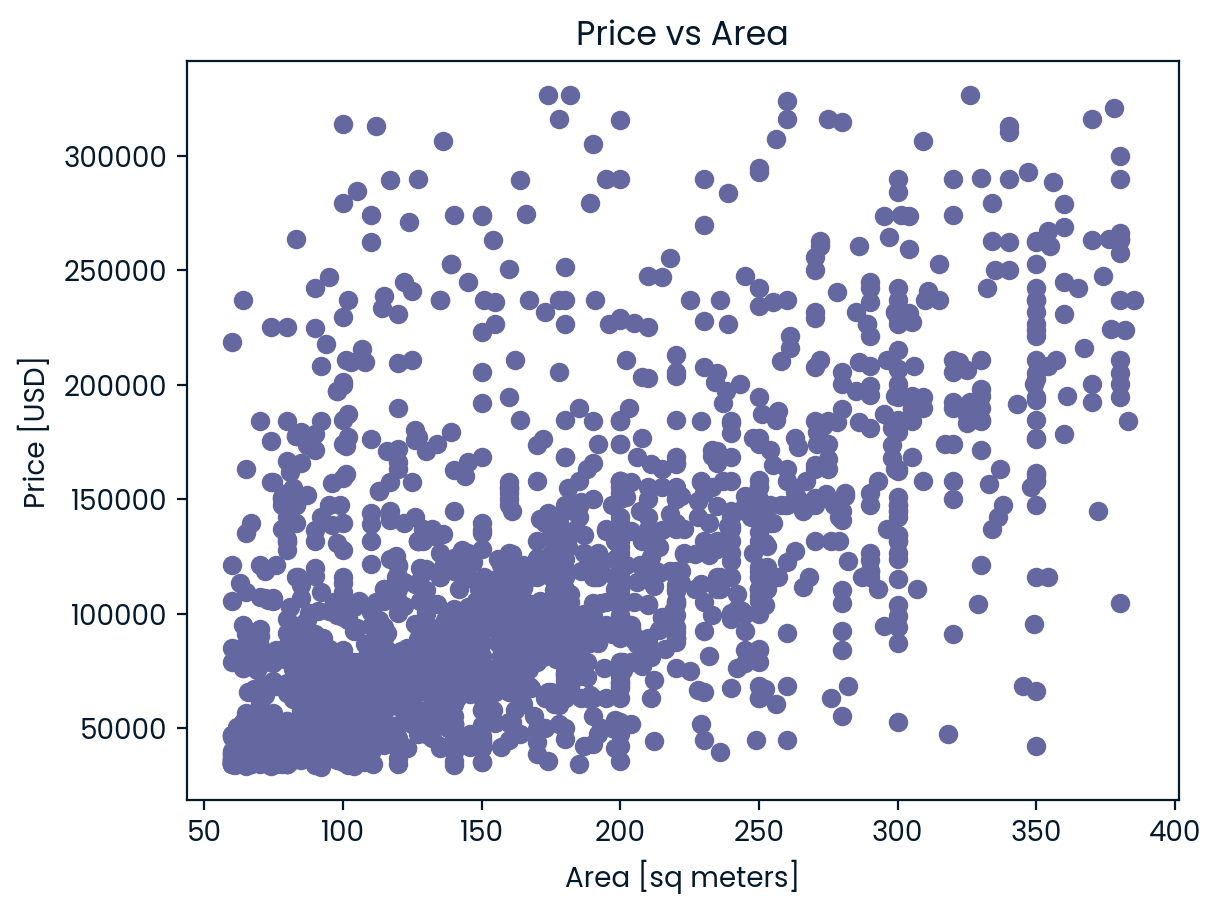

In [51]:
# Create scatter plot of "price_usd" vs "area_m2"
plt.scatter(x= df["area_m2"], y= df["price_usd"])

# Add x-axis label
plt.xlabel("Area [sq meters]")

# Add y-axis label
plt.ylabel("Price [USD]")

# Add title
plt.title("Price vs Area");

**While there's a good amount of variation, there's definitely a positive correlation — in other words, the bigger the house, the higher the price. But how can we quantify this **correlation?****

## **Task 1.4.7: Using the corr method, calculate the Pearson correlation coefficient for "area_m2" and "price_usd".**

In [53]:
# Calculate correlation of "price_usd" and "area_m2"
p_correlation = df["price_usd"].corr(df["area_m2"])

# Print correlation coefficient
print("Correlation of 'area_m2' and 'price_usd' (all Mexico):", p_correlation)

Correlation of 'area_m2' and 'price_usd' (all Mexico): 0.585518245323206


**The correlation coefficient is over 0.5, so there's a moderate relationship house size and price in Mexico. But does this relationship hold true in every state? Let's look at a couple of states, starting with Morelos.**

## **Task 1.4.8: Create a new DataFrame named df_morelos. It should include all the houses from df that are in the state of Morelos.**

In [54]:
# Declare variable `df_morelos` by subsetting `df`
df_morelos = df[df["state"] == "Morelos"]

# Print object type, shape, and head
print("df_morelos type:", type(df_morelos))
print("df_morelos shape:", df_morelos.shape)
df_morelos.head()

df_morelos type: <class 'pandas.core.frame.DataFrame'>
df_morelos shape: (160, 7)


,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
9,house,Morelos,18.812605,-98.954826,281,151509.56,539.179929
12,house,Morelos,18.804197,-98.932816,117,63223.78,540.374188
21,house,Morelos,18.855343,-99.241142,73,36775.16,503.769315
60,house,Morelos,18.804197,-98.932816,130,65858.10,506.600769
66,house,Morelos,18.960244,-99.212962,305,227351.46,745.414623


## **Task 1.4.9: Using df_morelos, create a scatter plot that shows price vs area. Make sure to use the same axis labels as your last scatter plot. The title should be "Morelos: Price vs. Area".**

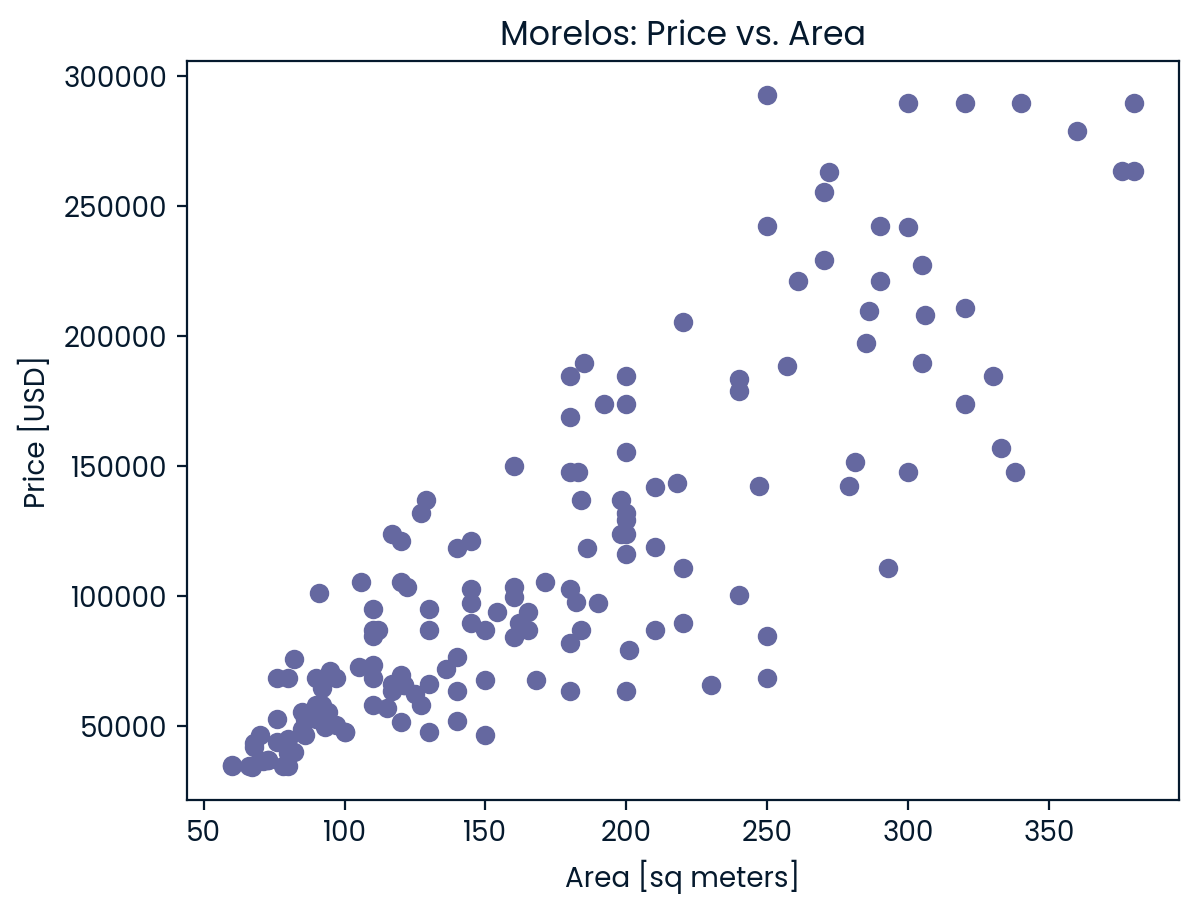

In [57]:
# Create scatter plot of "price_usd" vs "area_m2" in Morelos
plt.scatter(x=df_morelos["area_m2"], y=df_morelos["price_usd"])

# Add x-axis label
plt.xlabel("Area [sq meters]")

# Add y-axis label
plt.ylabel("Price [USD]")

# Add title
plt.title("Morelos: Price vs. Area");

**Wow! It looks like the correlation is even stronger within Morelos. Let's calculate the correlation coefficient and verify that that's the case.**

## **Task 1.4.10: Using the corr method, calculate the Pearson correlation coefficient for "area_m2" and "price_usd" in df_morelos**

In [58]:
# Calculate correlation of "price_usd" and "area_m2" in `df_morelos`
p_correlation = df_morelos["area_m2"].corr(df_morelos["price_usd"])

# Print correlation coefficient
print("Correlation of 'area_m2' and 'price_usd' (Morelos):", p_correlation)

Correlation of 'area_m2' and 'price_usd' (Morelos): 0.8498077608713708


With a correlation coefficient that high, we can say that there's a strong relationship between house size and price in Morelos.

To conclude, let's look at the capital Mexico City (Distrito Federal).

## **Task 1.4.11: First, create a new DataFrame called df_mexico_city that includes all the observations from df that are part of the Distrito Federal. Next, create a scatter plot that shows price vs area. Don't forget to label the x- and y-axis and use the title "Mexico City: Price vs. Area". Finally, calculate the correlation coefficient for "area_m2" and "price_usd" in df_mexico_city.**

df_mexico_city type: <class 'pandas.core.frame.DataFrame'>
df_mexico_city shape: (303, 7)
Correlation of 'area_m2' and 'price_usd' (Mexico City): 0.41070392130717864


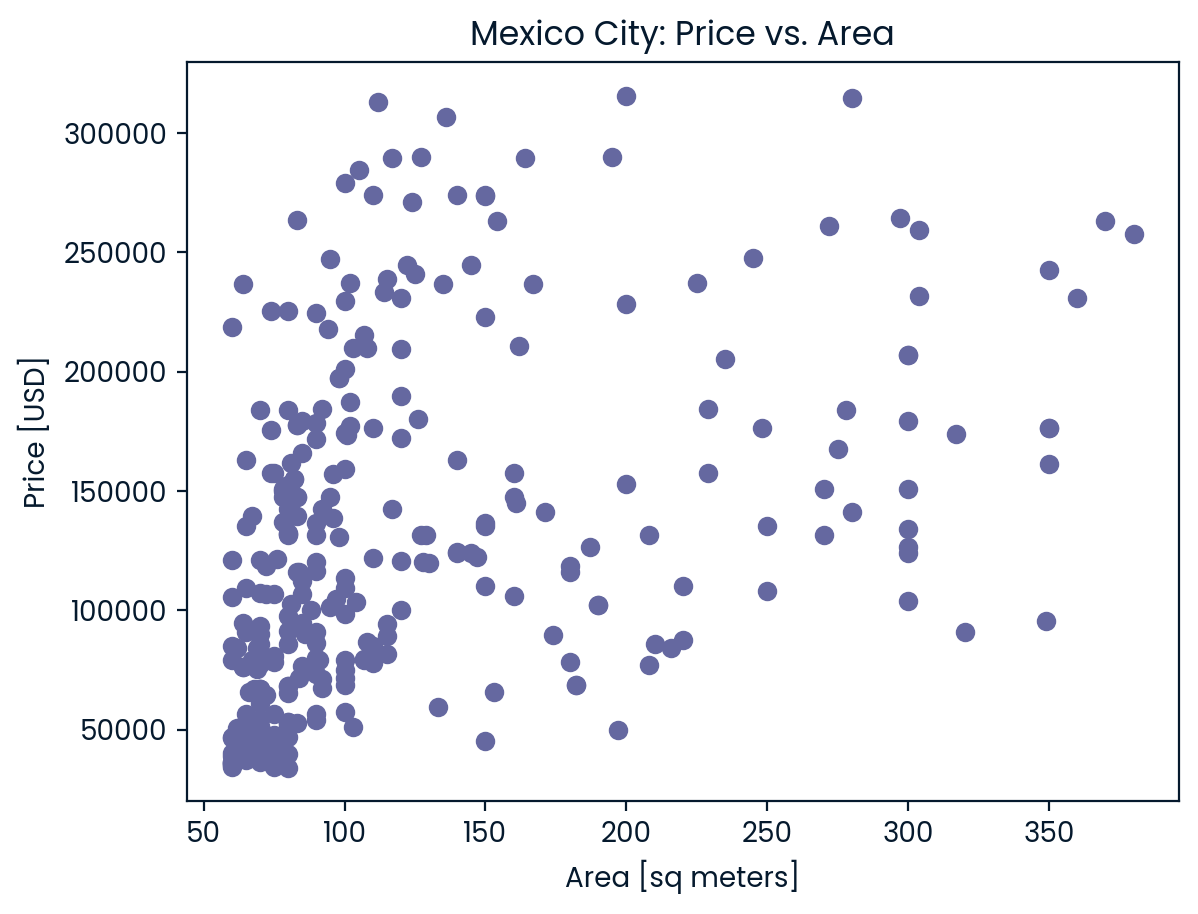

In [59]:
# Declare variable `df_mexico_city` by subsetting `df`
df_mexico_city = df[df["state"] == "Distrito Federal"]

# Print object type and shape
print("df_mexico_city type:", type(df_mexico_city))
print("df_mexico_city shape:", df_mexico_city.shape)

# Create a scatter plot "price_usd" vs "area_m2" in Distrito Federal
plt.scatter(df_mexico_city["area_m2"], df_mexico_city["price_usd"])  

# Add x-axis label
plt.xlabel("Area [sq meters]")  

# Add y-axis label
plt.ylabel("Price [USD]") 

# Add title
plt.title("Mexico City: Price vs. Area")  

# Calculate correlation of "price_usd" and "area_m2" in `df_mexico_city`
p_correlation = df_mexico_city["area_m2"].corr(df_mexico_city["price_usd"])

# Print correlation coefficient
print("Correlation of 'area_m2' and 'price_usd' (Mexico City):", p_correlation);

Looking at the scatter plot and correlation coefficient, there's see a weak relationship between size and price. How should we interpret this?

One interpretation is that the relationship we see between size and price in many states doesn't hold true in the country's biggest and most economically powerful urban center because there are other factors that have a larger influence on price. In fact, in the next project, we're going to look at another important Latin American city — Buenos Aires, Argentina — and build a model that predicts housing price by taking much more than size into account.